In [1]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns
import DNSmodule as dns

params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.style.use('ggplot')

# Have to compare magnetic and kinetic decay for several cases in the same plot. Schekochichin mentions that studies found that magnetic decay is always shallower than kinetic M ~ t**-4/7 < t**-2/3 and  K ~ t**-5/7> t**-2/3

In [3]:
def Lkol(eps,visc):
    return np.power((visc**3)/(eps),1/4)

Pm = 2
visc = 0.008
N = 256
kmax = int(N/3)-1
print('k_max = ',kmax)
print('Pm = ',Pm)
print('$visc = $', visc)
eta = visc/Pm
Lkol(0.1,eta) * kmax

k_max =  84
Pm =  2
$visc = $ 0.008


2.3758787847867997

In [4]:
def resolution_check(f_NH):
    

    ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
    idx_sort = np.argsort(Pms)
    ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
    colors = sns.color_palette('hls',len(f_NH))
    for id_f, f in enumerate(f_NH):
        lu = lus[id_f]
        lb = lbs[id_f]
        Pm = Pms[id_f]
        N = Ns[id_f]
        visc = viscs[id_f]
        kmax = ks[id_f].max()
        time = times[id_f]
        plt.plot(time,kmax*lu,c=colors[id_f],lw=2,label='{} {} {}'.format(N,visc,Pm))
        plt.plot(time,kmax*lb,c=colors[id_f])
        if (True in (kmax * lu < 1.25 )) or (True in (kmax * lb < 1.25 )):
            print(f)
        
    plt.legend(ncol=3,fontsize=12)
    plt.xlim(0.1,5  )
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(0.5,4)
    plt.show()

NH_v0.005/nhh.b_2048_0.005_32.spc


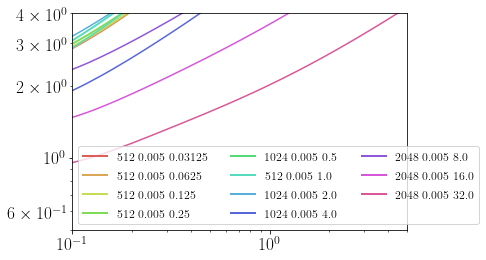

In [43]:
f_NH = glob('NH_v0.005/*.b*.spc')
resolution_check(f_NH)

# varying Pm, fixed viscosity = 0.005

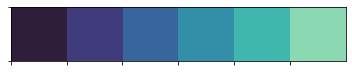

In [11]:
sns.palplot(sns.color_palette('mako'))

nonhelical
Pm = 0.03125 	 p = 2.81 	 q = 0.42
Pm = 0.03125 	 pk = 2.26 	 qk = 0.46
Pm = 0.0625 	 p = 2.79 	 q = 0.51
Pm = 0.0625 	 pk = 2.26 	 qk = 0.46
Pm = 0.125 	 p = 2.74 	 q = 0.52
Pm = 0.125 	 pk = 2.26 	 qk = 0.46
Pm = 0.25 	 p = 2.50 	 q = 0.47
Pm = 0.25 	 pk = 2.22 	 qk = 0.46
Pm = 0.5 	 p = 2.40 	 q = 0.50
Pm = 0.5 	 pk = 2.20 	 qk = 0.45
Pm = 1.0 	 p = 2.24 	 q = 0.45
Pm = 1.0 	 pk = 2.16 	 qk = 0.45
Pm = 2.0 	 p = 1.96 	 q = 0.43
Pm = 2.0 	 pk = 2.09 	 qk = 0.46
Pm = 4.0 	 p = 1.78 	 q = 0.40
Pm = 4.0 	 pk = 1.95 	 qk = 0.47
Pm = 8.0 	 p = 1.57 	 q = 0.38
Pm = 8.0 	 pk = 1.73 	 qk = 0.46
Pm = 16.0 	 p = 1.38 	 q = 0.36
Pm = 16.0 	 pk = 1.52 	 qk = 0.42
Pm = 32.0 	 p = 1.21 	 q = 0.35
Pm = 32.0 	 pk = 1.40 	 qk = 0.38


No handles with labels found to put in legend.
No handles with labels found to put in legend.


helical
Pm = 0.03125 	 p = 2.81 	 q = 0.41
Pm = 0.03125 	 pk = 2.26 	 qk = 0.46
Pm = 0.0625 	 p = 2.80 	 q = 0.51
Pm = 0.0625 	 pk = 2.26 	 qk = 0.46
Pm = 0.125 	 p = 2.76 	 q = 0.48
Pm = 0.125 	 pk = 2.22 	 qk = 0.46
Pm = 0.25 	 p = 2.58 	 q = 0.47
Pm = 0.25 	 pk = 2.24 	 qk = 0.45
Pm = 0.5 	 p = 2.54 	 q = 0.52
Pm = 0.5 	 pk = 2.18 	 qk = 0.47
Pm = 1.0 	 p = 2.31 	 q = 0.43
Pm = 1.0 	 pk = 2.05 	 qk = 0.44
Pm = 2.0 	 p = 1.68 	 q = 0.37
Pm = 2.0 	 pk = 1.68 	 qk = 0.47
Pm = 4.0 	 p = 1.16 	 q = 0.41
Pm = 4.0 	 pk = 1.13 	 qk = 0.47
Pm = 8.0 	 p = 0.86 	 q = 0.46
Pm = 8.0 	 pk = 0.87 	 qk = 0.53
Pm = 16.0 	 p = 0.72 	 q = 0.48
Pm = 16.0 	 pk = 0.71 	 qk = 0.57
Pm = 32.0 	 p = 0.64 	 q = 0.49
Pm = 32.0 	 pk = 0.59 	 qk = 0.59


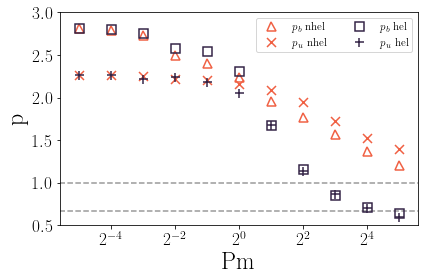

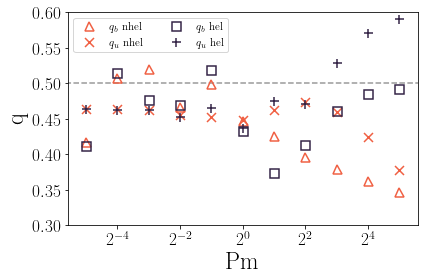

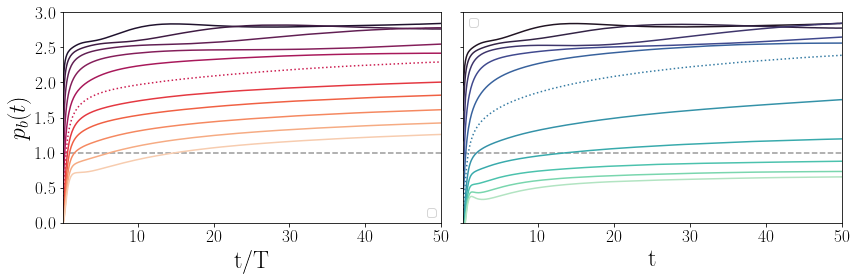

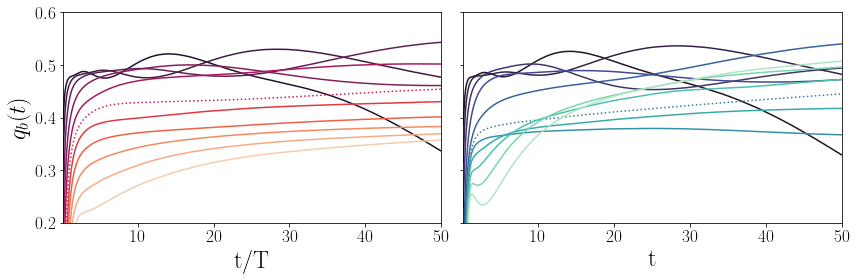

In [50]:
#plt.style.use('ggplot')

figp, axp = plt.subplots()
figq, axq = plt.subplots()
fign, [axn0,axn1] = plt.subplots(1,2,sharey=True,figsize=(12,4))
figl, [axl0,axl1] = plt.subplots(1,2,sharey=True,figsize=(12,4))

ti = 300
tf = -1

f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
pn = []
qn = []
pkn = []
qkn = []

col_NH = sns.color_palette('rocket',len(f_NH))
print('nonhelical')
for idx, f in enumerate(f_NH):

    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]

    time = times[idx]
    nn = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    ln =  np.gradient(np.log(Lb[1:]),np.log(time[1:]))
    E = Es[idx]
    Lu = Lus[idx]
    ls= ':' if Pm ==1 else '-'
    tag = 'nhel' if idx==0 else '__nolegend__'
    axn0.plot(time[1:]/0.1,nn,color=col_NH[idx],ls=ls) 
    axl0.plot(time[1:]/0.1,ln,color=col_NH[idx],ls=ls) 
        
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    pn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qn.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkn.append(mq)
    print('Pm = {} \t pk = {:.2f} \t qk = {:.2f}'.format(Pm,-mp,mq))
    

pn = np.array(pn)
qn = np.array(qn)
pkn = np.array(pkn)
qkn = np.array(qkn)

axp.plot(Pms, -pn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label='{:<}    {:>}'.format('$p_b$', 'nhel'))
axq.plot(Pms, qn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label = '{:<}    {:>}'.format('$q_b$','nhel'))
axp.plot(Pms, -pkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label='{:<}    {:>}'.format('$p_u$', 'nhel'))
axq.plot(Pms, qkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label = '{:<}    {:>}'.format('$q_u$','nhel'))



f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
ph = []
qh = []
pkh = []
qkh = []
col_H = sns.color_palette('mako',len(f_H))
print('helical')
for idx, f in enumerate(f_H):
 
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    nh = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    lh =  np.gradient(np.log(Lb[1:]),np.log(time[1:]))
   # tag = 'hel' if idx==7 else '__nolegend__'
    ls = ':' if Pm ==1 else '-'
    axn1.plot(time[1:]/0.1,nh,color=col_H[idx],ls=ls) 
    axl1.plot(time[1:]/0.1,lh,color=col_H[idx],ls=ls)
    E = Es[idx]
    Lu = Lus[idx]
    
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    ph.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qh.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkh.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkh.append(mq)
    print('Pm = {} \t pk = {:.2f} \t qk = {:.2f}'.format(Pm,-mp,mq))

ph = np.array(ph)
qh = np.array(qh)
pkh = np.array(pkh)
qkh = np.array(qkh)

axp.plot(Pms, -ph,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_H[1],label='{:<}    {:>}'.format('$p_b$', 'hel'))
axq.plot(Pms, qh,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_H[1],label = '{:<}    {:>}'.format('$q_b$','hel'))
axp.plot(Pms, -pkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_H[1],label='{:<}    {:>}'.format('$p_u$', 'hel'))
axq.plot(Pms, qkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_H[1],label = '{:<}    {:>}'.format('$q_u$','hel'))


axp.set_xscale('log',basex=2)
axp.set_ylabel('p',size = 24)
axp.set_xlabel('Pm',size = 24)
axp.legend(fontsize=11,ncol=2)
axp.hlines([1,2/3],1e-4,1e3,linestyles = '--',colors = '0.6')
axp.set_xlim(1/48,48)
axp.set_ylim(0.5,3)
figp.tight_layout()
#figp.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')

axq.set_xscale('log',basex=2)
axq.set_ylabel('q',size = 24)
axq.set_xlabel('Pm',size = 24)
axq.legend(fontsize=11,ncol=2)
axq.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axq.set_xlim(1/48,48)
axq.set_ylim(0.3,0.6)
figq.tight_layout()


#axn.set_xscale('',basex=2)
axn0.set_ylabel('$p_b(t)$',size = 24)
axn0.set_xlabel('t/T',size = 24)
axn0.legend(fontsize=11,ncol=2,loc=4)
axn0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axn0.set_xlim(5e-2,50)
axn0.set_ylim(0,3)

#axn.set_xscale('',basex=2)

#axn1.set_ylabel('n',size = 24)
axn1.set_xlabel('t',size = 24)
axn1.legend(fontsize=11,ncol=2)
axn1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axn1.set_xlim(1e-1,50)
axn1.set_ylim(0,3)
fign.tight_layout()

#axn.set_xscale('',basex=2)
axl0.set_ylabel('$q_b(t)$',size = 24)
axl0.set_xlabel('t/T',size = 24)
#axl0.legend(fontsize=11,ncol=2,loc=4)
axl0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axl0.set_xlim(5e-2,50)
axl0.set_ylim(0.2,0.6)

#axn.set_xscale('',basex=2)

#axn1.set_ylabel('n',size = 24)
axl1.set_xlabel('t',size = 24)
#axl1.legend(fontsize=11,ncol=2,loc=4)
axl1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axl1.set_xlim(1e-1,50)
axl1.set_ylim(0.2,0.6)
figl.tight_layout()

#figp.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()

In [58]:
Res = []
k_maxs = []
NHs = []
for id_f,f in enumerate(f_NH):
    Res.append(int(Us[idx][0]*Lus[id_f][0]/viscs[id_f]))
    k_maxs.append(ks[id_f][-1])
    NHs.append('NH_{}')


df= pd.DataFrame({'Run':NHs,'$P_m$': Pms,'$\\nu$': viscs,'$Re$': Res,'$k_p$': kps.astype(int), '$N$':Ns})
df = df.round({'$\\nu$': 3,'$Re$': 1,'$P_m$': 5,'$k_p$': 1, '$N$':0})
print(df.to_latex(index = False,escape=False))


\begin{tabular}{lrrrrr}
\toprule
   Run &     $P_m$ &  $\nu$ &  $Re$ &  $k_p$ &   $N$ \\
\midrule
 NH_{} &   0.03125 &  0.005 &     8 &     40 &   512 \\
 NH_{} &   0.06250 &  0.005 &     8 &     40 &   512 \\
 NH_{} &   0.12500 &  0.005 &     8 &     40 &   512 \\
 NH_{} &   0.25000 &  0.005 &     8 &     40 &   512 \\
 NH_{} &   1.00000 &  0.005 &     8 &     40 &   512 \\
 NH_{} &   2.00000 &  0.005 &     8 &     40 &  1024 \\
 NH_{} &   4.00000 &  0.005 &     8 &     40 &  1024 \\
 NH_{} &   8.00000 &  0.005 &     8 &     40 &  2048 \\
 NH_{} &  16.00000 &  0.005 &     8 &     40 &  2048 \\
 NH_{} &  32.00000 &  0.005 &     8 &     40 &  2048 \\
\bottomrule
\end{tabular}



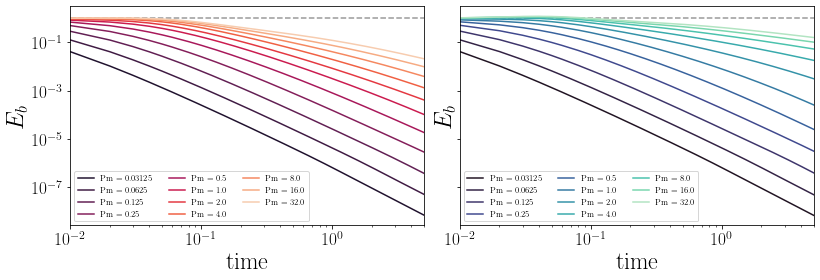

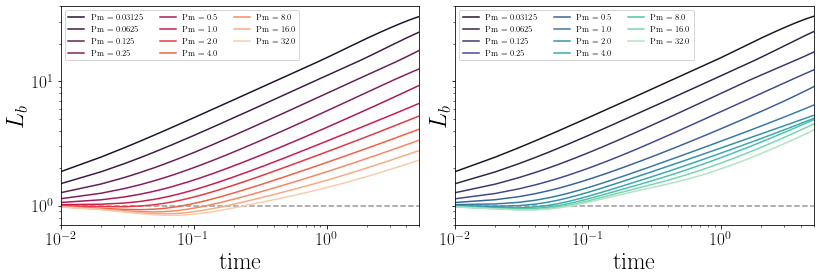

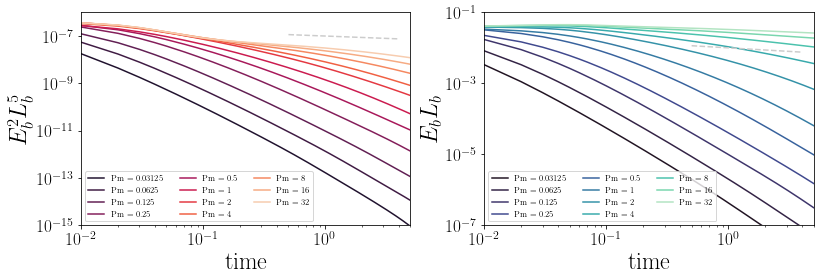

In [65]:
figE, [axE0,axE1] = plt.subplots(1,2,sharey=True,figsize=(11.5,4))
figL, [axL0,axL1] = plt.subplots(1,2,sharey=True,figsize=(11.5,4))
figH, [axH0,axH1] = plt.subplots(1,2,figsize=(11.5,4))


f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))



for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    axE0.plot(time, B/B[0], color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axL0.plot(time,Lb/Lb[0], color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axH0.plot(time,np.power(B,2)*np.power(Lb,5), color=col_NH[id_f], label = 'Pm = {}'.format(int(Pm) if Pm.is_integer() else Pm))
    
f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
col_H = sns.color_palette('mako',len(f_H))



for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    axE1.plot(time, B/B[0], color=col_H[id_f], label = 'Pm = {}'.format(Pm))
    axL1.plot(time,Lb/Lb[0], color=col_H[id_f], label = 'Pm = {}'.format(Pm))
    axH1.plot(time,B*Lb, color=col_H[id_f], label = 'Pm = {}'.format(int(Pm) if Pm.is_integer() else Pm))
    
    
axE0.set_xscale('log')
axE0.set_yscale('log')
axE0.set_ylabel('$E_{b}$',size = 24)
axE0.set_xlabel('time',size = 24)
axE0.legend(fontsize=8,ncol=3)
axE0.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE0.set_xlim(1e-2,5)
axE1.set_xscale('log')
axE1.set_yscale('log')
axE1.set_ylabel('$E_{b}$',size = 24)
axE1.set_xlabel('time',size = 24)
axE1.legend(fontsize=8,ncol=3)
axE1.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE1.set_xlim(1e-2,5)


axL0.set_xscale('log')
axL0.set_yscale('log')
axL0.set_ylabel('$L_{b}$',size = 24)
axL0.set_xlabel('time',size = 24)
axL0.legend(fontsize=8,ncol=3)
axL0.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL0.set_xlim(1e-2,5)

axL1.set_xscale('log')
axL1.set_yscale('log')
axL1.set_ylabel('$L_{b}$',size = 24)
axL1.set_xlabel('time',size = 24)
axL1.legend(fontsize=8,ncol=3)
axL1.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL1.set_xlim(1e-2,5)


axH0.set_xscale('log')
axH0.set_yscale('log')
axH0.set_ylabel('$E_b^2 L^5_{b}$',size = 24)
axH0.set_xlabel('time',size = 24)
axH0.legend(fontsize=8,ncol=3)
axH0.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axH0.plot([0.5,4],1e-7*np.power(np.array([0.5,4]),-0.2),c='0.8',ls='--')
axH0.set_xlim(1e-2,5)
axH0.set_ylim(1e-15,1e-6)


axH1.set_xscale('log')
axH1.set_yscale('log')
axH1.set_ylabel('$E_b L_{b}$',size = 24)
axH1.set_xlabel('time',size = 24)
axH1.legend(fontsize=8,ncol=3)
axH1.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axH1.set_xlim(1e-2,5)
axH1.plot([0.5,4],1e-2*np.power(np.array([0.5,4]),-0.2),c='0.8',ls='--')
axH1.set_ylim(1e-7,1e-1)


figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
figH.tight_layout()

plt.show()

In [25]:
def spec(k,t):
    return np.power(k,4)*np.exp(-2*0.005*np.power(k,2)*t)

[1.  1.2 1.4 1.6 1.8 2. ]


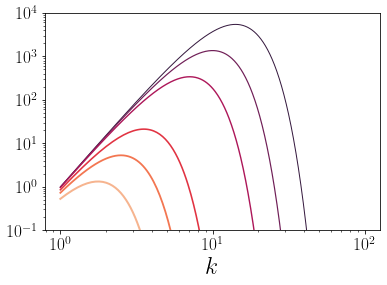

In [46]:

fig, ax = plt.subplots()

t = [1,2,4,16,32,64]
lws = np.linspace(1,2,len(t))
print(lws)
#plt.style.use('ggplot')

col_NH = sns.color_palette('rocket',len(t))

k= np.arange(1,100,0.1)

for id_t,idx_t in enumerate(t):
    
    y = spec(k,idx_t)
    
    if idx_t == 0:
        ax.plot(k,y,c=col_NH[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
    else:
        ax.plot(k,y,c=col_NH[id_t], lw = lws[id_t])
        


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-1,1e4)
ax.set_xlabel('$k$',fontsize=24)
Lmax = []
t = np.arange(1,10000,10)
for idx_t in t:
    y = spec(k,idx_t)
    Lmax.append(1/k[np.argmax(y)])
Lmax = np.array(Lmax)



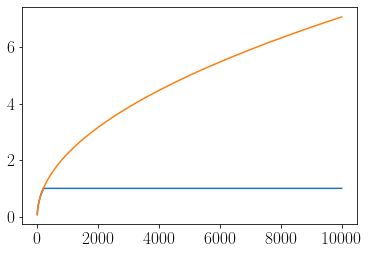

In [48]:
plt.plot(np.arange(1,10000,10),Lmax)
plt.plot(np.arange(1,10000,10),np.power(0.005*np.arange(1,10000,10),1/2))

In [62]:
print(t_T)

[0.8240146839334322, 3.296058735733729, 13.184234942934916, 49.543882871497615, 0.8207488431645049, 3.2829953726580197, 13.131981490632079, 49.34752419526586, 0.8207488314005843, 3.282995325602337, 13.131981302409349, 49.34752348796013, 0.8207488314005843, 3.282995325602337, 13.131981302409349, 49.34752348796013]


[1.   1.25 1.5  1.75 2.  ]
NH_v0.005/nhb.b_512_0.005_0.0625.spc
NH_v0.005/nhd.b_512_0.005_1.spc
NH_v0.005/nhf.b_2048_0.005_8.spc
NH_v0.005/nhh.b_2048_0.005_32.spc


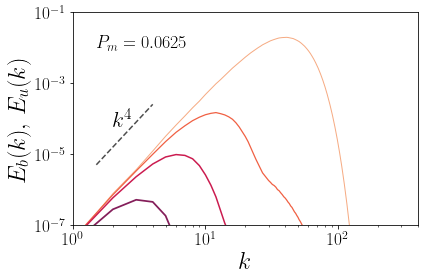

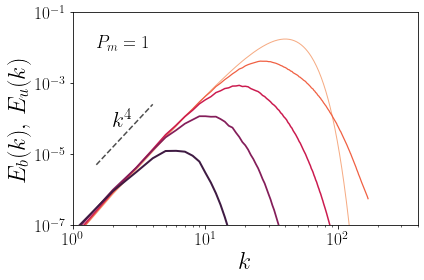

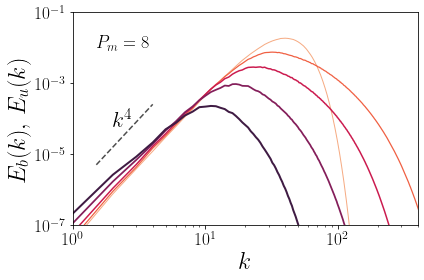

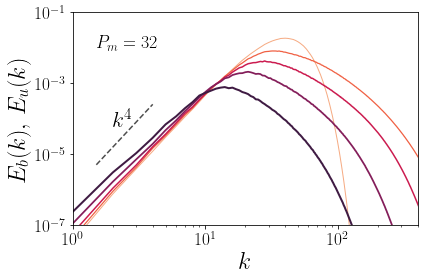

In [27]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)


Pmss = ['_0.0625.','_1.','_8.','_32.']
t = [0,8,32,128,481]
lws = np.linspace(1,2,len(t))
print(lws)
#plt.style.use('ggplot')

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []

for idx, f in enumerate(f_NH):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
            Bk = Bks[idx]
            Ek = Eks[idx]
            Pm = Pms[idx]
            T = Tus[idx][0]
            
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]

            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                    
                else:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t], lw = lws[id_t])
                   # ax.plot(k,Ek[idx_t],c=col_NH[id_t], ls = '--', lw = lws[id_t])
                    t_T.append(idx_t*0.01/T)
            
            k_slope = np.array([1.5,4])
            ax.plot(k_slope,1e-6*np.power(k_slope,4),c='0.3',ls='--')
            ax.text(2,6e-5,'$k^{4}$',size=22)
            Pm = int(Pm) if Pm.is_integer() else Pm        
            ax.text(1.5,1e-2,'$P_m= {}$'.format(Pm),size=18)
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k), \, E_u(k)$',fontsize=24)
            ax.set_xlabel('$k$',fontsize=24)
            ax.set_ylim(1e-7,1e-1)
            ax.set_xlim(1,400)
            #ax.legend(fontsize=7)
            fig.tight_layout()
            #fig.savefig('Eb_nhel_{}.pdf'.format(Pm),format='pdf')


[1.   1.25 1.5  1.75 2.  ]
H_v0.005/hb.b_512_0.005_0.0625.spc
H_v0.005/hd.b_512_0.005_1.spc
H_v0.005/hf.b_2048_0.005_8.spc
H_v0.005/hh.b_2048_0.005_32.spc


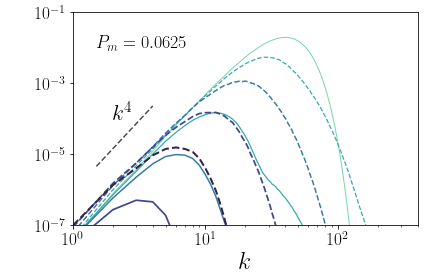

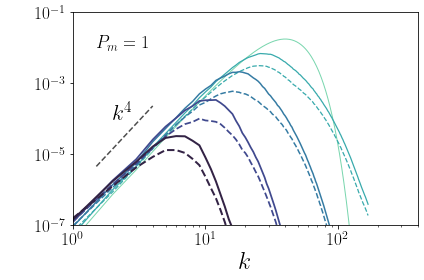

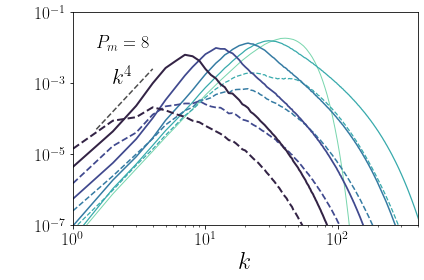

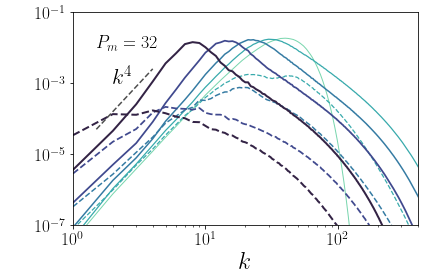

In [64]:
f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)


Pmss = ['_0.0625.','_1.','_8.','_32.']
t = [0,8,32,128,481] 
lws = np.linspace(1,2,len(t))
print(lws)
#plt.style.use('ggplot')

col_H = sns.color_palette('mako',len(t))
col_H.reverse()
t_T = []

for idx, f in enumerate(f_H):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
            Bk = Bks[idx]
            Ek = Eks[idx]
            Pm = Pms[idx]
            T = Tus[idx][0]
            t_T.append(t/T)
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]


            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Bk[idx_t],c=col_H[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                else:
                    ax.plot(k,Bk[idx_t],c=col_H[id_t], lw = lws[id_t])
                    ax.plot(k,Ek[idx_t],c=col_H[id_t], ls='--', lw = lws[id_t])
            k_slope = np.array([1.5,4])
            if Pm in np.array([8.0,32.0]):
                ax.plot(k_slope,1e-5*np.power(k_slope,4),c='0.3',ls='--')
                ax.text(2,1e-3,'$k^{4}$',size=22)
            else:
                ax.plot(k_slope,9e-7*np.power(k_slope,4),c='0.3',ls='--')
                ax.text(2,1e-4,'$k^{4}$',size=22)
            Pm = int(Pm) if Pm.is_integer() else Pm        
            ax.text(1.5,1e-2,'$P_m= {}$'.format(Pm),size=18)
            #k_slope = np.array([40.0,100.0])
            #ax.plot(k_slope,5e-2*np.power(k_slope,-2),c='0.3',ls='--')
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k),\, E_u(k)$',color='white',fontsize=24)
            ax.set_xlabel('$k$',fontsize=24)
            ax.set_ylim(1e-7,1e-1)
            ax.set_xlim(1,400)
            #ax.legend(fontsize=7)
            fig.tight_layout()
            fig.savefig('Eb_hel_{}.pdf'.format(Pm),format='pdf')


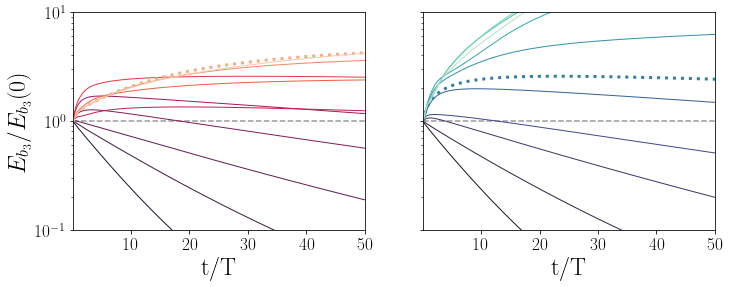

In [22]:
f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)

#plt.style.use('ggplot')

figE, [axE0,axE1] = plt.subplots(1,2,figsize=(11.5,4),sharey=True)

col_H = sns.color_palette('mako',len(f_H))

for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tus[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    int(Pm) if Pm.is_integer() else Pm
    B3 = dns.integrate(Bk,0,3,k)
    axE1.plot(time[:-1]/T[0], B3/B3[0], color=col_H[id_f],ls=(':' if Pm==1 else '-'), lw=(3 if Pm==1 else 1),label = 'Pm = {}'.format(Pm))

    
    
    
    
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))
for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tus[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    int(Pm) if Pm.is_integer() else Pm
    B3 = dns.integrate(Bk,0,3,k)
    axE0.plot(time[:-1]/T[0], B3/B3[0], color=col_NH[id_f], ls=(':' if Pm==16 else '-'),lw=(3 if Pm==16 else 1),label = 'Pm = {}'.format(Pm))


#axE.set_xscale('log')
axE0.set_yscale('log')
axE0.set_ylabel('$E_{b_3}/E_{b_3}(0)$',size = 24)
axE0.set_xlabel('t/T',size = 24)
#axE.legend(fontsize=12,ncol=3)
axE0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE0.set_xlim(1e-1,50)
axE0.set_ylim(1e-1,1e1)

#axE.set_xscale('log')
axE1.set_yscale('log')
#axE1.set_ylabel('$E_{b_3}/E_{b_3}(0)$',size = 24)
axE1.set_xlabel('t/T',size = 24)
#axE.legend(fontsize=12,ncol=3)
axE1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE1.set_xlim(1e-1,50)
axE1.set_ylim(1e-1,1e1)


#figE.tight_layout()
#figE.savefig('E3_vs_t.pdf',format='pdf')

plt.show()

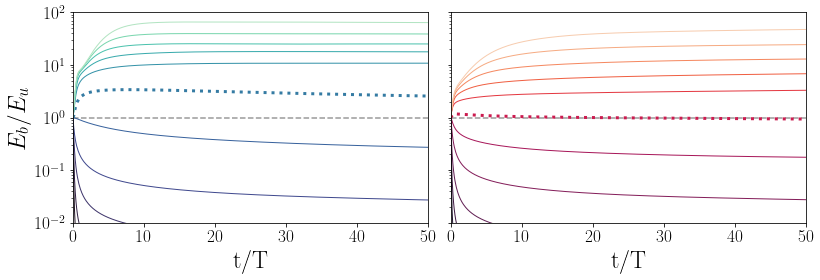

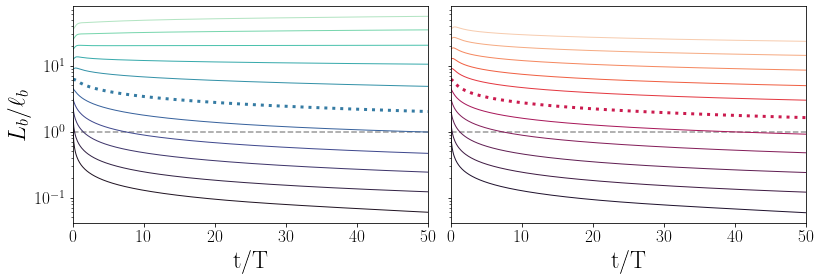

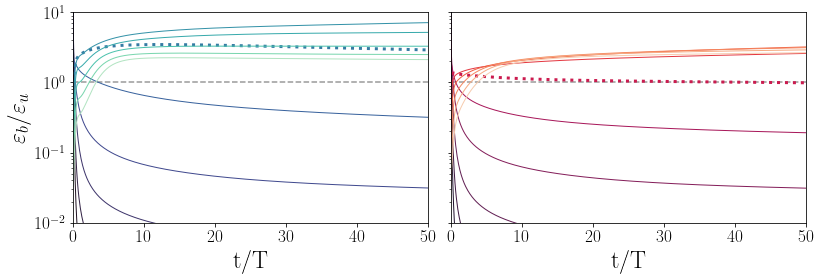

In [72]:

#plt.style.use('ggplot')

figE, [axEh,axEnh] = plt.subplots(1,2,sharex=True,sharey=True,figsize=(11.5,4))
figL, [axLh,axLnh] = plt.subplots(1,2,sharex=True,sharey=True,figsize=(11.5,4))
figeps,[axepsh,axepsnh] = plt.subplots(1,2,sharex=True,sharey=True,figsize=(11.5,4))
col_H = sns.color_palette('mako',len(f_H))


f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)

for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    #print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axEh.plot(time/T[0], B/E, color=col_H[id_f],lw=(3 if Pm==1 else 1),ls=(':' if Pm==1 else '-'), label = 'Pm = {}'.format(Pm))
    axLh.plot(time/T[0],Lb/lb, color=col_H[id_f],lw=(3 if Pm==1 else 1),ls=(':' if Pm==1 else '-'), label = 'Pm = {}'.format(Pm))
    axepsh.plot(time/T[0],epsb/epsu,color=col_H[id_f],lw=(3 if Pm==1 else 1),ls=(':' if Pm==1 else '-'), label='Pm={}'.format(Pm))

f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))
for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    #print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axEnh.plot(time/0.1, B/E, color=col_NH[id_f], lw=(3 if Pm==1 else 1),ls=(':' if Pm==1 else '-'), label = 'Pm = {}'.format(Pm))
    axLnh.plot(time/0.1,Lb/lb, color=col_NH[id_f], lw=(3 if Pm==1 else 1), ls=(':' if Pm==1 else '-'), label = 'Pm = {}'.format(Pm))
    axepsnh.plot(time/0.1,epsb/epsu,color=col_NH[id_f],lw=(3 if Pm==1 else 1),ls=(':' if Pm==1 else '-'), label='Pm={}'.format(Pm))

#axEh.set_xscale('log')
axEh.set_yscale('log')
axEh.set_ylabel('$E_{b}/E_u$',size = 24)
axEh.set_xlabel('t/T',size = 24)
#axEh.legend(fontsize=8,ncol=3)
axEh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
#axEh.set_xlim(1e-1,50)
axEh.set_ylim(1e-2,1e2)


#axLh.set_xscale('log')
axLh.set_yscale('log')
axLh.set_ylabel('$L_{b}/\ell_b$',size = 24)
axLh.set_xlabel('t/T',size = 24)
#axLh.legend(fontsize=10)
axLh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
#axLh.set_xlim(1e-1,50)

#axepsh.set_xscale('log')
axepsh.set_yscale('log')
axepsh.set_ylabel('$\\varepsilon_{b}/\\varepsilon_u$',size = 24)
axepsh.set_xlabel('t/T',size = 24)
#axepsh.legend(fontsize=10,ncol=3)
axepsh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
#axepsh.set_xlim(1e-1,50)
#axepsh.set_ylim(1e-2,1e1)


#axEnh.set_xscale('log')
axEnh.set_yscale('log')
#axEnh.set_ylabel('$E_{b}/E_u$',size = 24)
axEnh.set_xlabel('t/T',size = 24)
#axEnh.legend(fontsize=8,ncol=3)
axEnh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axEnh.set_xlim(0,50)

#axLnh.set_xscale('log')
axLnh.set_yscale('log')
#axLnh.set_ylabel('$L_{b}/L_u$',size = 24)
axLnh.set_xlabel('t/T',size = 24)
#axLnh.legend(fontsize=10,ncol=3)
axLnh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axLnh.set_xlim(0,50)

#axepsnh.set_xscale('log')
axepsnh.set_yscale('log')
#axepsnh.set_ylabel('$\\varepsilon_{b}/\\varepsilon_u$',size = 24)
axepsnh.set_xlabel('t/T',size = 24)
#axepsnh.legend(fontsize=10)
axepsnh.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axepsnh.set_xlim(0,50)
axepsnh.set_ylim(1e-2,1e1)

figE.tight_layout()
#fig.savefig('EbEu_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lblb_vs_t_DNS.pdf',format='pdf')
figeps.tight_layout()
#figeps.savefig('epsbepsu.pdf',format='pdf')
plt.show()

[1.   1.25 1.5  1.75 2.  ]
H_v0.005/hb.b_512_0.005_0.0625.spc
H_v0.005/hd.b_512_0.005_1.spc
H_v0.005/hf.b_2048_0.005_8.spc
H_v0.005/hh.b_2048_0.005_32.spc


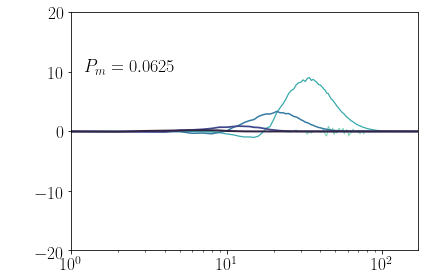

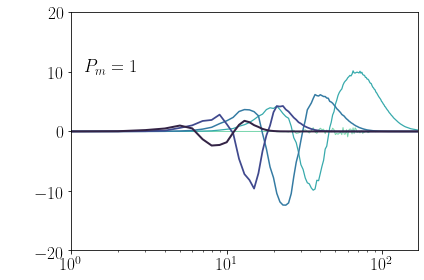

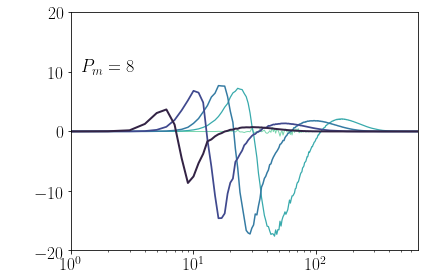

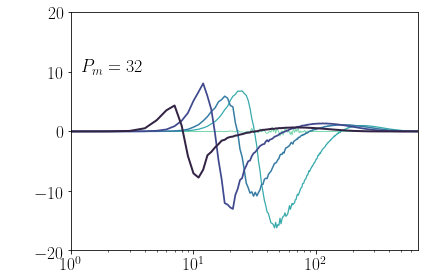

In [25]:

f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs, epsus, epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
Tubks = []
Tbks = []

for id_f, f in enumerate(f_H):
    
    Tbks.append(dns.Tb_spectrum(f))

Pmss = ['_0.0625.','_1.','_8.','_32.']
t = [0,8,32,128,481]
lws = np.linspace(1,2,len(t))
print(lws)
#plt.style.use('ggplot')

col_H = sns.color_palette('mako',len(t))
col_H.reverse()
t_T = []

for idx, f in enumerate(f_H):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
         
            Pm = Pms[idx]
            E = Es[idx]
            T = Tus[idx][0]
            Tbk = Tbks[idx]
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]

            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_H[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                    
                else:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_H[id_t], lw = lws[id_t])
                   
                    t_T.append(idx_t*0.01/T)
            
            #k_slope = np.array([1.5,4])
            #ax.plot(k_slope,1e-6*np.power(k_slope,4),c='0.3',ls='--')
            #ax.text(2,6e-5,'$k^{4}$',size=22)
            Pm = int(Pm) if Pm.is_integer() else Pm        
            ax.text(1.2,10,'$P_m= {}$'.format(Pm),size=18)
            #ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k), \, E_u(k)$',fontsize=24,color='white')
            #ax.set_xlabel('$k$',fontsize=24)
            ax.set_ylim(-20,20)
            ax.set_xlim(1,k.max())
            #ax.legend(fontsize=7)
            fig.tight_layout()
            #fig.savefig('Eb_nhel_{}.pdf'.format(Pm),format='pdf')


[1.   1.25 1.5  1.75 2.  ]
NH_v0.005/nhb.b_512_0.005_0.0625.spc
NH_v0.005/nhd.b_512_0.005_1.spc
NH_v0.005/nhf.b_2048_0.005_8.spc
NH_v0.005/nhh.b_2048_0.005_32.spc


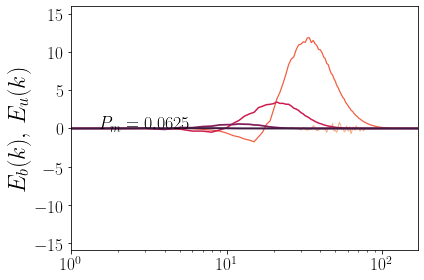

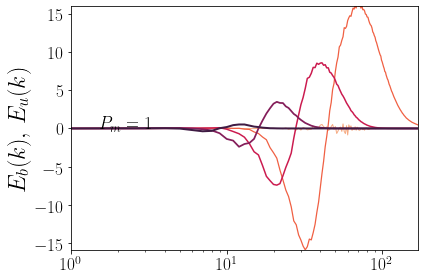

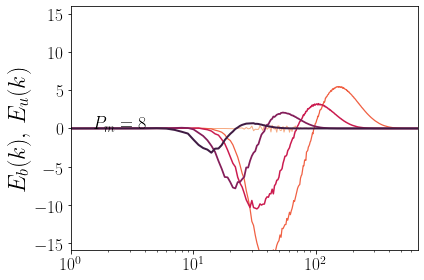

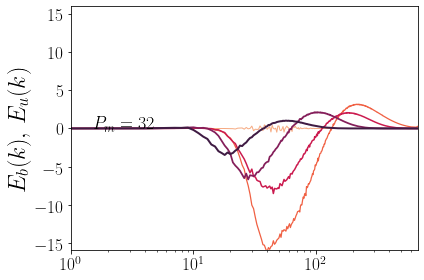

In [24]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs, epsus, epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
Tubks = []
Tbks = []

for id_f, f in enumerate(f_NH):
    
    Tbks.append(dns.Tb_spectrum(f))

Pmss = ['_0.0625.','_1.','_8.','_32.']
t = [0,8,32,128,481]
lws = np.linspace(1,2,len(t))
print(lws)
#plt.style.use('ggplot')

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []

for idx, f in enumerate(f_NH):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
         
            Pm = Pms[idx]
            T = Tus[idx][0]
            Tbk = Tbks[idx]
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]

            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_NH[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                    
                else:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_NH[id_t], lw = lws[id_t])
                   
                    t_T.append(idx_t*0.01/T)
            
            #k_slope = np.array([1.5,4])
            #ax.plot(k_slope,1e-6*np.power(k_slope,4),c='0.3',ls='--')
            #ax.text(2,6e-5,'$k^{4}$',size=22)
            Pm = int(Pm) if Pm.is_integer() else Pm        
            ax.text(1.5,1e-2,'$P_m= {}$'.format(Pm),size=18)
            #ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k), \, E_u(k)$',fontsize=24)
            #ax.set_xlabel('$k$',fontsize=24)
            ax.set_ylim(-16,16)
            ax.set_xlim(1,k.max())
            #ax.legend(fontsize=7)
            fig.tight_layout()
            #fig.savefig('Eb_nhel_{}.pdf'.format(Pm),format='pdf')


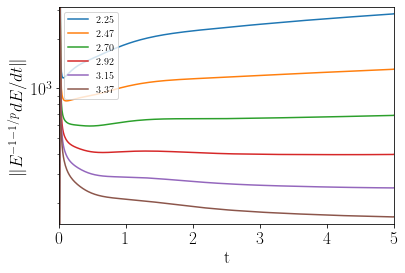

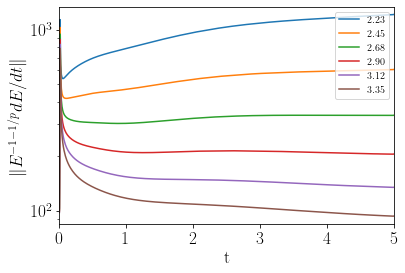

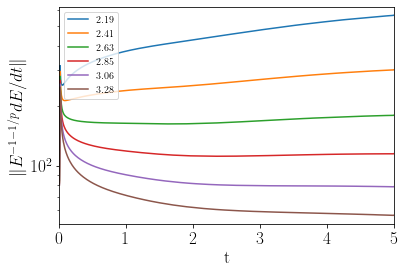

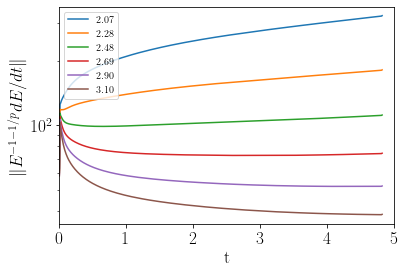

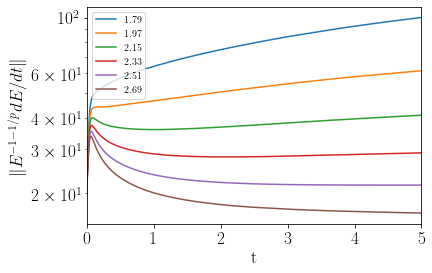

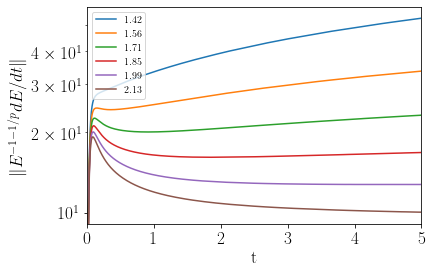

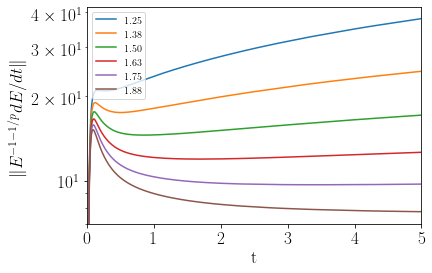

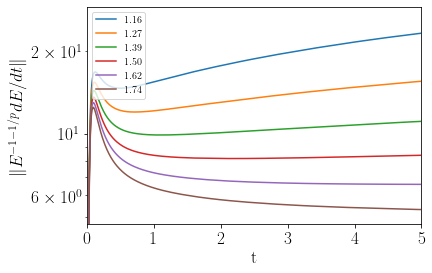

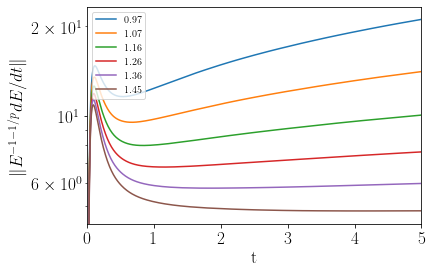

In [2]:

f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

for idx, f in enumerate(f_NH):
    
    time = times[idx]
    B = Bs[idx]
    
    dns.p(time,B)